<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorios N°01

## Objetivos del laboratorio

* Reforzar conceptos básicos de regresión lineal.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

**Pregunta 1**

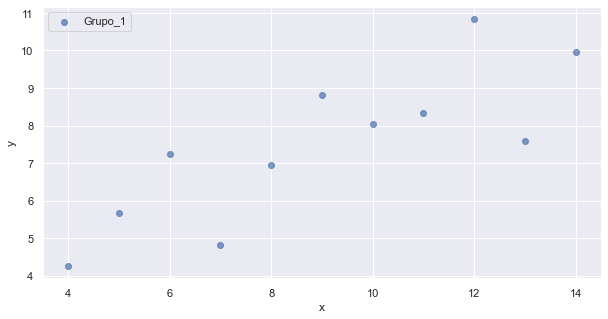

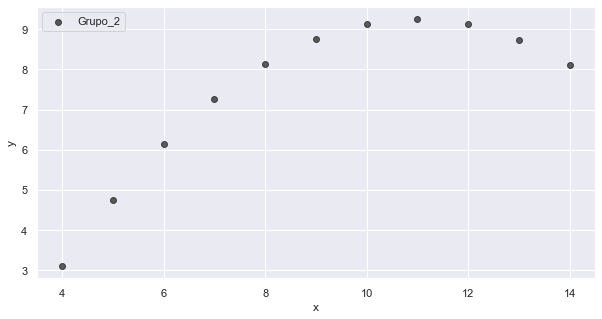

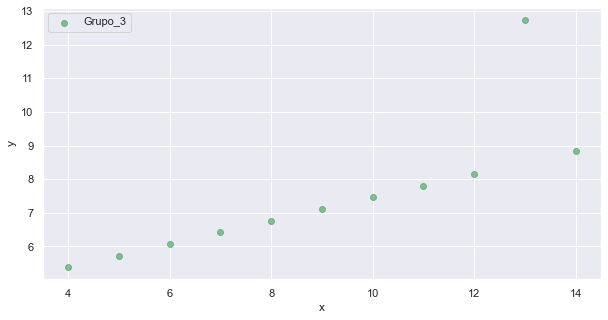

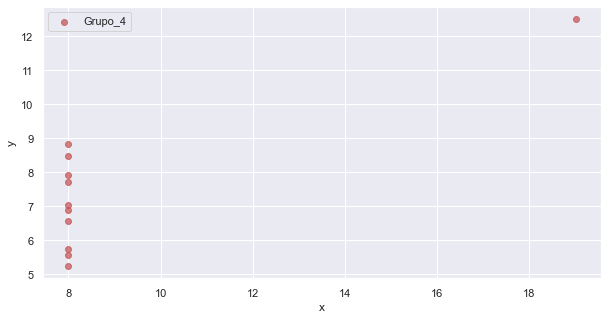

In [4]:
gr1=[[],[]]
gr2=[[],[]]
gr3=[[],[]]
gr4=[[],[]]

for i in range(len(df)):
    if df['grupo'][i]==df['grupo'].unique()[0]:
        gr1[0].append(df['x'][i])
        gr1[1].append(df['y'][i])
    
    if df['grupo'][i]==df['grupo'].unique()[1]:
        gr2[0].append(df['x'][i])
        gr2[1].append(df['y'][i])
        
    if df['grupo'][i]==df['grupo'].unique()[2]:
        gr3[0].append(df['x'][i])
        gr3[1].append(df['y'][i])
        
    if df['grupo'][i]==df['grupo'].unique()[3]:
        gr4[0].append(df['x'][i])
        gr4[1].append(df['y'][i])

grupos=[gr1,gr2,gr3,gr4]
cl=['b','k','g','r']

for gr in grupos:
    fig = plt.figure(figsize=(10, 5)) # ventana
    plt.scatter(
        gr[0], # eje x
        gr[1], # eje y
        c=cl[grupos.index(gr)], # color
        alpha=0.7, # intensidad color
        label=df['grupo'].unique()[grupos.index(gr)] # etiquetdo fijando posicion
        )
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc='upper left')
    plt.show()

**Pregunta 2**

In [50]:
df[:len(gr1[0])].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [59]:
df[len(gr1[0]):len(gr1[0])+len(gr2[0])].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [62]:
df[len(gr1[0])+len(gr2[0]):len(gr1[0])+len(gr2[0])+len(gr3[0])].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [ ]:
df[len(gr1[0])+len(gr2[0])+len(gr3[0]):len(gr1[0])+len(gr2[0])+len(gr3[0])+len(gr4[0])].describe()

**Pregunta 3 y 4**

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df1=df[:len(gr1[0])]
df2=df[len(gr1[0]):len(gr1[0])+len(gr2[0])]
df3=df[len(gr1[0])+len(gr2[0]):len(gr1[0])+len(gr2[0])+len(gr3[0])]
df4=df[len(gr1[0])+len(gr2[0])+len(gr3[0]):len(gr1[0])+len(gr2[0])+len(gr3[0])+len(gr4[0])]

#Ajuste y gráfico de regresión para Grupo 1 

X = df1[['x']] 
y = df1['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

Separando informacion:

numero de filas data original :  11
numero de filas train set     :  8
numero de filas test set      :  3


In [6]:
model_rl = LinearRegression() # Creando el modelo. 
model_rl.fit(X_train, y_train) # Ajustando el modelo

LinearRegression()

In [7]:
# Lista de coeficientes Beta para cada X

beta_0 = round(model_rl.intercept_,2)
beta_1 = round(model_rl.coef_[0],2)

print(f"El mejor ajuste lineal viene dado por la recta: \n\n     \
f(x) = {beta_0} + {beta_1}*x")

El mejor ajuste lineal viene dado por la recta: 

     f(x) = 3.47 + 0.47*x


In [8]:
#predicción Grupo 1
Y_predict = model_rl.predict(X_test)
Y_predict

array([10.04589744,  8.16615385,  6.75634615])

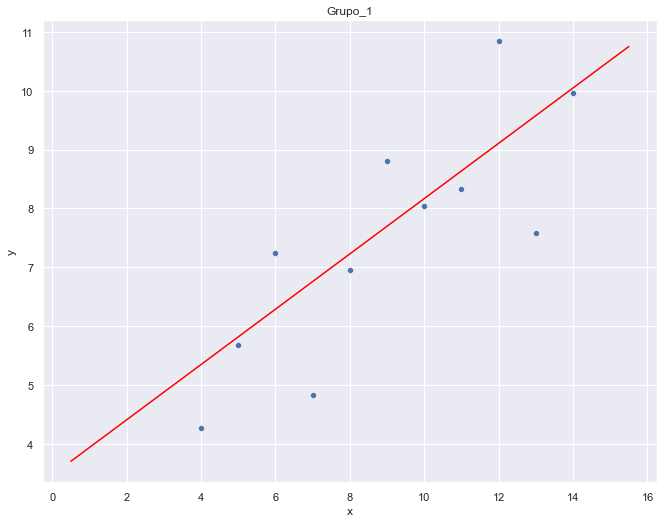

In [9]:
#Gráfico Grupo 1
beta_0 = model_rl.intercept_
beta_1 = model_rl.coef_[0]
        
x_range = np.arange(0.5,16,1)
        
df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1*n for n in x_range]})
  
df = pd.DataFrame({'x':X['x'],
                    'y_true':y})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="red")

plt.title('Grupo_1')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [10]:
from metrics_regression import *
from sklearn.metrics import r2_score
 
#metricas Grupo 1
df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': model_rl.predict(X_test)
        }
)

df_metrics = summary_metrics(df_temp)
df_metrics['r2'] =  round(r2_score(y_test, model_rl.predict(X_test)),4)
print('\nMetricas para el regresor Grupo 1:\n')
print(df_metrics)


Metricas para el regresor Grupo 1:

      mae     mse    rmse   mape   maape   wmape   mmape   smape      r2
0  0.7161  1.2576  1.1214  0.142  0.1354  0.0941  0.1182  0.1196  0.7204


In [11]:
#Ajuste y gráfico de regresión para Grupo 2

X = df2[['x']] 
y = df2['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

Separando informacion:

numero de filas data original :  11
numero de filas train set     :  8
numero de filas test set      :  3


In [12]:
model_rl = LinearRegression() # Creando el modelo. 
model_rl.fit(X_train, y_train) # Ajustando el modelo

LinearRegression()

In [13]:
# Lista de coeficientes Beta para cada X
beta_0 = round(model_rl.intercept_,2)
beta_1 = round(model_rl.coef_[0],2)

print(f"El mejor ajuste lineal viene dado por la recta: \n\n     \
f(x) = {beta_0} + {beta_1}*x")

El mejor ajuste lineal viene dado por la recta: 

     f(x) = 1.92 + 0.63*x


In [14]:
#predicción Grupo 2
Y_predict = model_rl.predict(X_test)
Y_predict

array([10.69826923,  8.19134615,  6.31115385])

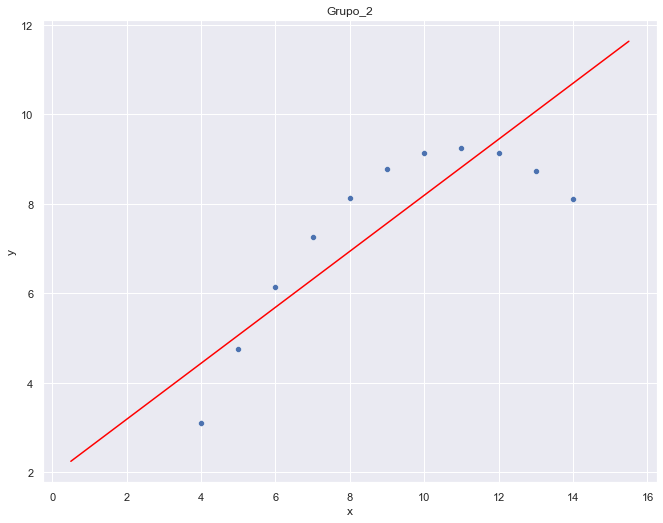

In [15]:
#Gráfico Grupo 2
beta_0 = model_rl.intercept_
beta_1 = model_rl.coef_[0]
        
x_range = np.arange(0.5,16,1)
        
df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1*n for n in x_range]})
  
df = pd.DataFrame({'x':X['x'],
                    'y_true':y})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="red")

plt.title('Grupo_2')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [16]:
#metricas Grupo 2
df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': model_rl.predict(X_test)
        }
)

df_metrics = summary_metrics(df_temp)
df_metrics['r2'] =  round(r2_score(y_test, model_rl.predict(X_test)),4)
print('\nMetricas para el regresor Grupo 2:\n')
print(df_metrics)


Metricas para el regresor Grupo 2:

      mae     mse    rmse    mape   maape   wmape   mmape   smape      r2
0  1.4986  2.8504  1.6883  0.1851  0.1813  0.1835  0.1647  0.1752 -3.8207


In [17]:
#Ajuste y gráfico de regresión para Grupo 3

X = df3[['x']] 
y = df3['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

Separando informacion:

numero de filas data original :  11
numero de filas train set     :  8
numero de filas test set      :  3


In [18]:
model_rl = LinearRegression() # Creando el modelo. 
model_rl.fit(X_train, y_train) # Ajustando el modelo

LinearRegression()

In [19]:
# Lista de coeficientes Beta para cada X
beta_0 = round(model_rl.intercept_,2)
beta_1 = round(model_rl.coef_[0],2)

print(f"El mejor ajuste lineal viene dado por la recta: \n\n     \
f(x) = {beta_0} + {beta_1}*x")

El mejor ajuste lineal viene dado por la recta: 

     f(x) = 2.46 + 0.59*x


In [20]:
#predicción Grupo 3
Y_predict = model_rl.predict(X_test)
Y_predict

array([10.71891026,  8.35788462,  6.58711538])

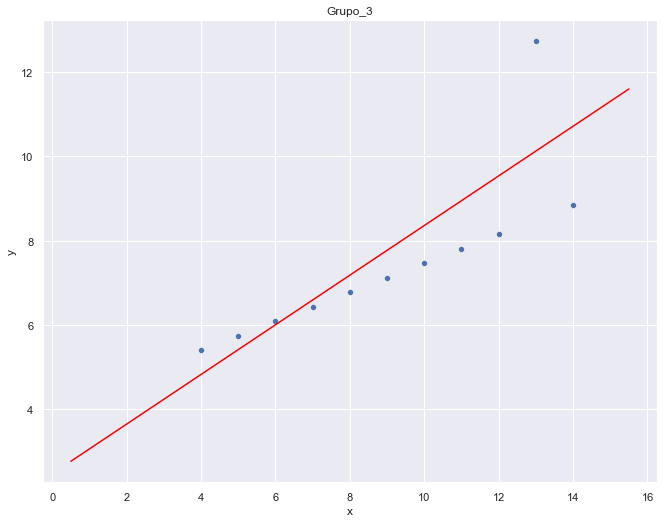

In [21]:
#Gráfico Grupo 3
beta_0 = model_rl.intercept_
beta_1 = model_rl.coef_[0]
        
x_range = np.arange(0.5,16,1)
        
df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1*n for n in x_range]})
  
df = pd.DataFrame({'x':X['x'],
                    'y_true':y})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="red")

plt.title('Grupo_3')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [22]:
#metricas Grupo 3
df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': model_rl.predict(X_test)
        }
)

df_metrics = summary_metrics(df_temp)
df_metrics['r2'] =  round(r2_score(y_test, model_rl.predict(X_test)),4)
print('\nMetricas para el regresor Grupo 3:\n')
print(df_metrics)


Metricas para el regresor Grupo 3:

      mae     mse    rmse    mape   maape   wmape   mmape   smape      r2
0  0.9813  1.4548  1.2062  0.1196  0.1184  0.1296  0.1065  0.1105 -0.4807


In [28]:
#Ajuste y gráfico de regresión para Grupo 4

X = df4[['x']] 
y = df4['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

Separando informacion:

numero de filas data original :  11
numero de filas train set     :  8
numero de filas test set      :  3


In [29]:
model_rl = LinearRegression() # Creando el modelo. 
model_rl.fit(X_train, y_train)  # Ajustando el modelo

LinearRegression()

In [30]:
# Lista de coeficientes Beta para cada X
beta_0 = round(model_rl.intercept_,2)
beta_1 = round(model_rl.coef_[0],2)

print(f"El mejor ajuste lineal viene dado por la recta: \n\n     \
f(x) = {beta_0} + {beta_1}*x")

El mejor ajuste lineal viene dado por la recta: 

     f(x) = 2.87 + 0.51*x


In [31]:
#predicción Grupo 4
Y_predict = model_rl.predict(X_test)
Y_predict

array([6.92571429, 6.92571429, 6.92571429])

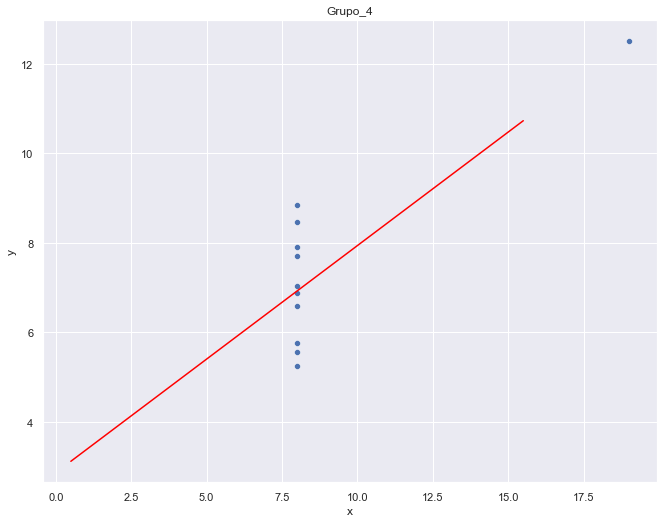

In [32]:
#Gráfico Grupo 4
beta_0 = model_rl.intercept_
beta_1 = model_rl.coef_[0]
        
x_range = np.arange(0.5,16,1)
        
df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1*n for n in x_range]})
  
df = pd.DataFrame({'x':X['x'],
                    'y_true':y})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="red")

plt.title('Grupo_4')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [33]:
#metricas Grupo 4
df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': model_rl.predict(X_test)
        }
)

df_metrics = summary_metrics(df_temp)
df_metrics['r2'] =  round(r2_score(y_test, model_rl.predict(X_test)),4)
print('\nMetricas para el regresor Grupo 3:\n')
print(df_metrics)


Metricas para el regresor Grupo 3:

      mae     mse    rmse    mape   maape   wmape   mmape   smape      r2
0  0.4814  0.3671  0.6059  0.0644  0.0642  0.0671  0.0568  0.0668 -0.2071


**Comentario:** Tal como se dijo en clases, la distribución de los datos claramente es diferente, sin embargo, la función lineal de regresión que la aproxima es muy parecida entre los cuatro datasets, reafirmando lo estipulado en "el cuarteto de Anscombe"

**Pregunta 5**

Es claro que la función de regresión que aproxima depende de la distribución que se puede observar (cuando es posible hacerlo) de los datos. Por ejemplo, en los caso del grupo 2 y 4, es notoria que la regresión hecha no es muy buena, por razones tanto visuales como de las métricas asociadas como el r^2 por ejemplo, y una propuesta de mejora podria ser una aproximación mediante polinomios cuadráticos para el grupo 2, y para el grupo 4, uno podría suponer que bastaria una recta vertical en x=8 para aproximar de buena forma los datos. Por otro lado, para el caso de los grupos 1 y 3 se puede decir que la regresión se realizó de una forma lógica como lo demuestran las métricas, asi como también de forma visual.